**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [281]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [282]:
# %%pycodestyle
from sklearn.neighbors import KDTree
from sklearn.metrics import pairwise_distances


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.current_algorithm = algorithm
        self.nghbrs = int(n_neighbors)

    def fit(self, X, y):
        self.X_for_learning = X
        self.y_for_learning = y
        if self.current_algorithm == 'kd_tree':
            self.kdtree = KDTree(self.X_for_learning)

    def predict(self, X):
        if self.current_algorithm == 'kd_tree':
            positions = self.kdtree.query(X, self.nghbrs)[1]
        else:
            dists = pairwise_distances(X, self.X_for_learning)
            positions = dists.argpartition(self.nghbrs)[:, :self.nghbrs]
        #print(positions[:, 0])
        #print(positions[:, 1])
        neighbor_classes = np.array(self.y_for_learning[positions])
        return np.array([np.argmax(np.bincount(i)) for i in neighbor_classes])

    def predict_proba(self, X):
        if self.current_algorithm == 'kd_tree':
            positions = self.kdtree.query(X, k=self.nghbrs)[1]
        else:
            dists = pairwise_distances(X, self.X_for_learning)
            positions = dists.argpartition(self.nghbrs)[:, :self.nghbrs]
        nc = np.array(self.y_for_learning[positions])
        ml = len(set(self.y_for_learning))
        npa = np.array([np.bincount(i, minlength=ml) for i in nc])
        return npa / self.nghbrs

    def score(self, X, y):
        return np.average(y == self.predict(X))

**IRIS**

In [227]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [228]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [229]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [230]:
%time clf.fit(X_train, y_train)

Wall time: 14.5 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [231]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [232]:
%time clf.predict(X_test)

Wall time: 8.98 ms


array([0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2])

In [233]:
%time my_clf.predict(X_test)

Wall time: 3.49 ms


array([0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2], dtype=int64)

In [234]:
%time clf.predict_proba(X_test)

Wall time: 5.99 ms


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [235]:
%time my_clf.predict_proba(X_test)

Wall time: 2.49 ms


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [236]:
clf.score(X_test, y_test)

0.9333333333333333

In [237]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

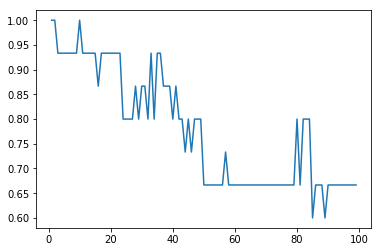

In [216]:
#%%pycodestyle

score_list = []
for i in range(1, 100):
    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    my_clf.fit(X_train, y_train)
    score_list.append(my_clf.score(X_test, y_test))
plt.plot(range(1, 100), score_list)

plt.show()

**MNIST**

In [217]:
from mnist import MNIST
mndata = MNIST('mnistfolder')
images, labels = mndata.load_training()
#mnistdt = fetch_mldata()

In [218]:
print(np.array(images).shape)
print(np.array(labels).shape)

(60000, 784)
(60000,)


In [260]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.01, stratify=labels)

In [261]:
print(np.array(X_train).dtype)
print(np.array(X_test).dtype)
print(np.array(y_train).dtype)
print(np.array(y_test).dtype)
print(np.array(X_train).shape)
print(np.array(X_test).shape)
print(np.array(y_train).shape)
print(np.array(y_test).shape)

int32
int32
int32
int32
(59400, 784)
(600, 784)
(59400,)
(600,)


In [262]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [263]:
%time clf.fit(X_train, y_train)

Wall time: 1min 15s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [264]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [242]:
%time clf.predict(X_test)

Wall time: 1min


array([7, 9, 0, 4, 5, 9, 3, 6, 1, 4, 1, 7, 2, 0, 6, 7, 7, 1, 3, 0, 0, 9,
       9, 1, 1, 7, 1, 2, 7, 7, 2, 8, 6, 1, 2, 8, 9, 5, 9, 7, 7, 7, 4, 3,
       5, 3, 3, 1, 1, 0, 2, 8, 8, 4, 2, 2, 3, 2, 8, 3, 6, 8, 8, 3, 5, 0,
       2, 2, 7, 2, 7, 9, 1, 3, 8, 3, 0, 7, 4, 8, 2, 4, 1, 1, 8, 1, 3, 3,
       3, 4, 0, 3, 5, 5, 9, 1, 3, 5, 1, 4, 9, 6, 5, 8, 9, 6, 5, 0, 1, 0,
       7, 6, 3, 0, 0, 1, 6, 0, 0, 9, 7, 1, 3, 7, 6, 8, 7, 9, 6, 9, 8, 5,
       5, 6, 1, 1, 3, 1, 2, 6, 2, 7, 5, 2, 3, 9, 6, 1, 0, 3, 4, 0, 0, 2,
       1, 0, 3, 7, 1, 6, 8, 1, 5, 2, 8, 3, 5, 7, 6, 6, 4, 2, 1, 5, 5, 7,
       8, 3, 0, 2, 9, 3, 7, 0, 3, 9, 9, 9, 2, 7, 9, 8, 2, 0, 5, 2, 6, 4,
       5, 4, 2, 1, 0, 9, 2, 0, 7, 2, 5, 0, 7, 6, 0, 9, 4, 3, 7, 2, 6, 3,
       0, 4, 3, 1, 4, 6, 3, 3, 1, 2, 2, 4, 0, 8, 4, 0, 1, 5, 7, 5, 2, 9,
       4, 7, 9, 5, 8, 2, 8, 7, 6, 3, 8, 8, 4, 2, 4, 9, 1, 1, 0, 2, 7, 3,
       7, 0, 9, 6, 4, 0, 9, 6, 9, 0, 1, 8, 3, 5, 9, 6, 3, 5, 8, 7, 4, 5,
       1, 6, 4, 1, 3, 6, 6, 9, 4, 5, 6, 4, 8, 1, 5,

In [243]:
%time my_clf.predict(X_test)

TypeError: only integer scalar arrays can be converted to a scalar index

In [244]:
%time clf.predict_proba(X_test)

Wall time: 1min 7s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [245]:
%time my_clf.predict_proba(X_test)

TypeError: only integer scalar arrays can be converted to a scalar index

In [246]:
clf.score(X_test, y_test)

0.9666666666666667

In [247]:
my_clf.score(X_test, y_test)

TypeError: only integer scalar arrays can be converted to a scalar index

Задание 4

In [283]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [276]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.01, stratify=labels)

In [277]:
%time clf.fit(X_train, y_train)

Wall time: 1min 14s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [284]:
%time my_clf.fit(X_train, y_train)

Wall time: 1min 49s


In [279]:
%time clf.predict(X_test)

Wall time: 2min 4s


array([1, 7, 6, 0, 0, 1, 5, 5, 5, 7, 6, 6, 2, 0, 6, 2, 7, 8, 8, 4, 4, 1,
       2, 9, 5, 0, 9, 8, 1, 9, 7, 1, 2, 3, 5, 3, 5, 2, 9, 3, 4, 4, 0, 1,
       2, 9, 2, 1, 4, 8, 6, 6, 2, 0, 4, 2, 3, 4, 2, 3, 9, 7, 2, 3, 2, 0,
       0, 7, 6, 6, 2, 3, 1, 8, 3, 1, 9, 4, 0, 1, 9, 5, 4, 8, 2, 1, 1, 2,
       8, 8, 3, 8, 3, 7, 8, 1, 3, 8, 9, 3, 0, 8, 2, 1, 9, 7, 6, 1, 5, 8,
       9, 8, 7, 3, 2, 4, 2, 2, 2, 6, 9, 2, 0, 8, 3, 4, 4, 6, 8, 9, 2, 4,
       4, 3, 9, 9, 4, 7, 3, 8, 6, 6, 3, 7, 0, 8, 6, 7, 3, 0, 6, 4, 7, 9,
       3, 7, 8, 7, 4, 1, 5, 1, 4, 5, 2, 3, 3, 8, 7, 5, 1, 6, 3, 0, 7, 5,
       0, 8, 6, 5, 1, 9, 3, 1, 9, 1, 5, 6, 8, 8, 7, 4, 1, 4, 5, 3, 7, 7,
       2, 3, 3, 2, 9, 0, 7, 4, 0, 3, 5, 7, 9, 8, 7, 7, 9, 8, 3, 9, 0, 2,
       4, 1, 5, 5, 1, 3, 1, 1, 1, 8, 6, 7, 8, 1, 7, 5, 0, 8, 4, 8, 9, 5,
       0, 7, 0, 4, 3, 4, 4, 2, 8, 5, 8, 7, 9, 2, 0, 0, 8, 0, 6, 9, 6, 2,
       8, 0, 6, 2, 1, 6, 9, 3, 1, 2, 7, 6, 9, 7, 1, 4, 2, 7, 7, 9, 9, 5,
       3, 4, 1, 2, 2, 3, 1, 8, 2, 1, 6, 2, 5, 1, 2,

In [285]:
%time my_clf.predict(X_test)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [5]:
# seaborn - для визуализации статистических моделей, различных многомерных данных
# matplotlib - для визуализации данных, построения графиков, на ней основана seaborn
# train_test_split - для деления выборки данных на тренировочную и тестовую
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - для поочерёдного выполнения действий с данными, чей-то вывод подаёт кому-то на ввод
# StandardScaler (from sklearn.preprocessing import StandardScaler) - для приведения данных к одинаковому виду, центрируя и нормируя
# ClassifierMixin - для наследования от него классификаторов из scikit-learn
# NeighborsBase - для оценок ближайших соседей
# KNeighborsMixin - для поиска ближайших соседей
# SupervisedIntegerMixin - для обучения реализации классификатора на заданных данных и значениях